In [101]:
## Flight Price prediction Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
df_train=pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_train.shape

(10683, 11)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df_train['Date']=df_train['Date_of_Journey'].str.split('/').str[0]
df_train['Month']=df_train['Date_of_Journey'].str.split('/').str[1]

In [6]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


In [7]:
df_train.drop('Date_of_Journey',axis=1,inplace=True)

In [8]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  object
 11  Month            10683 non-null  object
dtypes: int64(1), object(11)
memory usage: 1001.7+ KB


In [10]:
df_train['Date']=df_train['Date'].astype(int)
df_train['Month']=df_train['Month'].astype(int)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
dtypes: int32(2), int64(1), object(9)
memory usage: 918.2+ KB


In [12]:
df_train['Arrival_Time']=df_train['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [13]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
df_train.dropna(inplace=True)

In [15]:
df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
dtype: int64

In [16]:
df_train['Arrival_Hour']=df_train['Arrival_Time'].str.split(':').str[0]
df_train['Arrival_Min']=df_train['Arrival_Time'].str.split(':').str[1]

In [17]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35


In [18]:
df_train.drop('Arrival_Time',axis=1,inplace=True)

In [19]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Date             10682 non-null  int32 
 10  Month            10682 non-null  int32 
 11  Arrival_Hour     10682 non-null  object
 12  Arrival_Min      10682 non-null  object
dtypes: int32(2), int64(1), object(10)
memory usage: 1.1+ MB


In [21]:
df_train['Arrival_Hour']=df_train['Arrival_Hour'].astype(int)
df_train['Arrival_Min']=df_train['Arrival_Min'].astype(int)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Date             10682 non-null  int32 
 10  Month            10682 non-null  int32 
 11  Arrival_Hour     10682 non-null  int32 
 12  Arrival_Min      10682 non-null  int32 
dtypes: int32(4), int64(1), object(8)
memory usage: 1001.4+ KB


In [23]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35


In [24]:
df_train['Dep_Hour']=df_train['Dep_Time'].str.split(':').str[0]
df_train['Dep_Min']=df_train['Dep_Time'].str.split(':').str[1]

In [25]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Date             10682 non-null  int32 
 10  Month            10682 non-null  int32 
 11  Arrival_Hour     10682 non-null  int32 
 12  Arrival_Min      10682 non-null  int32 
 13  Dep_Hour         10682 non-null  object
 14  Dep_Min          10682 non-null  object
dtypes: int32(4), int64(1), object(10)
memory usage: 1.1+ MB


In [27]:
df_train['Dep_Hour']=df_train['Dep_Hour'].astype(int)
df_train['Dep_Min']=df_train['Dep_Min'].astype(int)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Date             10682 non-null  int32 
 10  Month            10682 non-null  int32 
 11  Arrival_Hour     10682 non-null  int32 
 12  Arrival_Min      10682 non-null  int32 
 13  Dep_Hour         10682 non-null  int32 
 14  Dep_Min          10682 non-null  int32 
dtypes: int32(6), int64(1), object(8)
memory usage: 1.1+ MB


In [29]:
df_train.drop('Dep_Time',axis=1,inplace=True)

In [30]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [31]:
df_train['Duration_Hour']=df_train['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [32]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4


In [33]:
df_train['Duration_Min']=df_train['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [34]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [35]:

df_train['Duration_Min']=df_train['Duration_Min'].replace(np.nan,'0')
df_train['Duration_Min']=df_train['Duration_Min'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Date             10682 non-null  int32 
 9   Month            10682 non-null  int32 
 10  Arrival_Hour     10682 non-null  int32 
 11  Arrival_Min      10682 non-null  int32 
 12  Dep_Hour         10682 non-null  int32 
 13  Dep_Min          10682 non-null  int32 
 14  Duration_Hour    10682 non-null  object
 15  Duration_Min     10682 non-null  int32 
dtypes: int32(7), int64(1), object(8)
memory usage: 1.1+ MB


In [36]:
df_train[df_train['Duration_Hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,16,55,16,50,5m,0


In [37]:
df_train.drop(6474,axis=0,inplace=True)

In [38]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [39]:
df_train['Duration_Hour']=df_train['Duration_Hour'].astype(int)

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Duration         10681 non-null  object
 5   Total_Stops      10681 non-null  object
 6   Additional_Info  10681 non-null  object
 7   Price            10681 non-null  int64 
 8   Date             10681 non-null  int32 
 9   Month            10681 non-null  int32 
 10  Arrival_Hour     10681 non-null  int32 
 11  Arrival_Min      10681 non-null  int32 
 12  Dep_Hour         10681 non-null  int32 
 13  Dep_Min          10681 non-null  int32 
 14  Duration_Hour    10681 non-null  int32 
 15  Duration_Min     10681 non-null  int32 
dtypes: int32(8), int64(1), object(7)
memory usage: 1.1+ MB


In [41]:
df_train.drop('Duration',axis=1,inplace=True)

In [42]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [43]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [44]:
df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [45]:
df_train['Total_Stops']=df_train['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [46]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,21,35,16,50,4,45


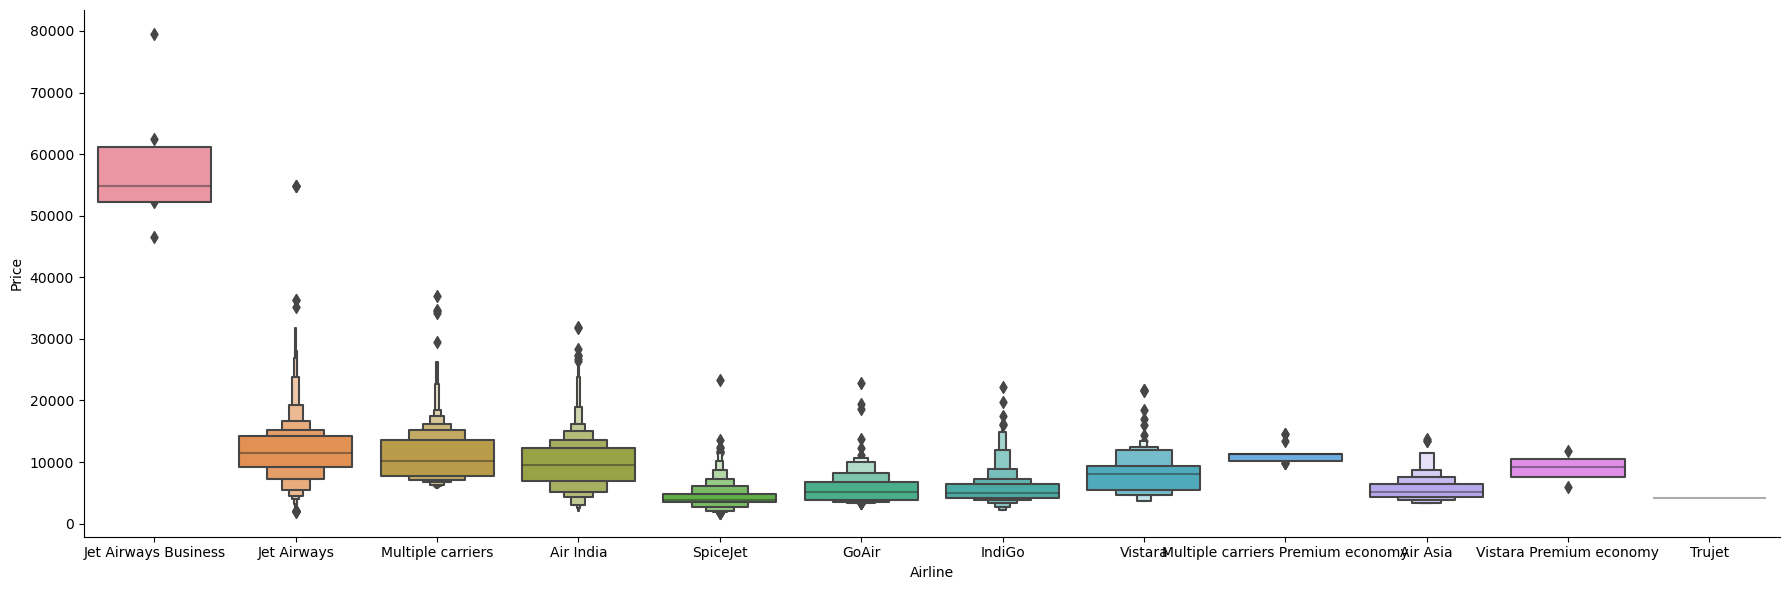

In [47]:
sns.catplot(y='Price',x='Airline',data=df_train.sort_values('Price',ascending=False),kind="boxen",height=6,aspect=3)

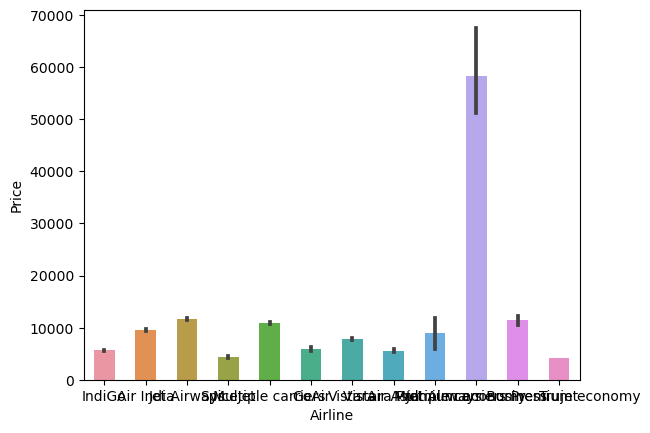

In [48]:
sns.barplot(x='Airline',y='Price',data=df_train,width=0.5,estimator='mean')
plt.show()

In [49]:
Airline=df_train['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [50]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

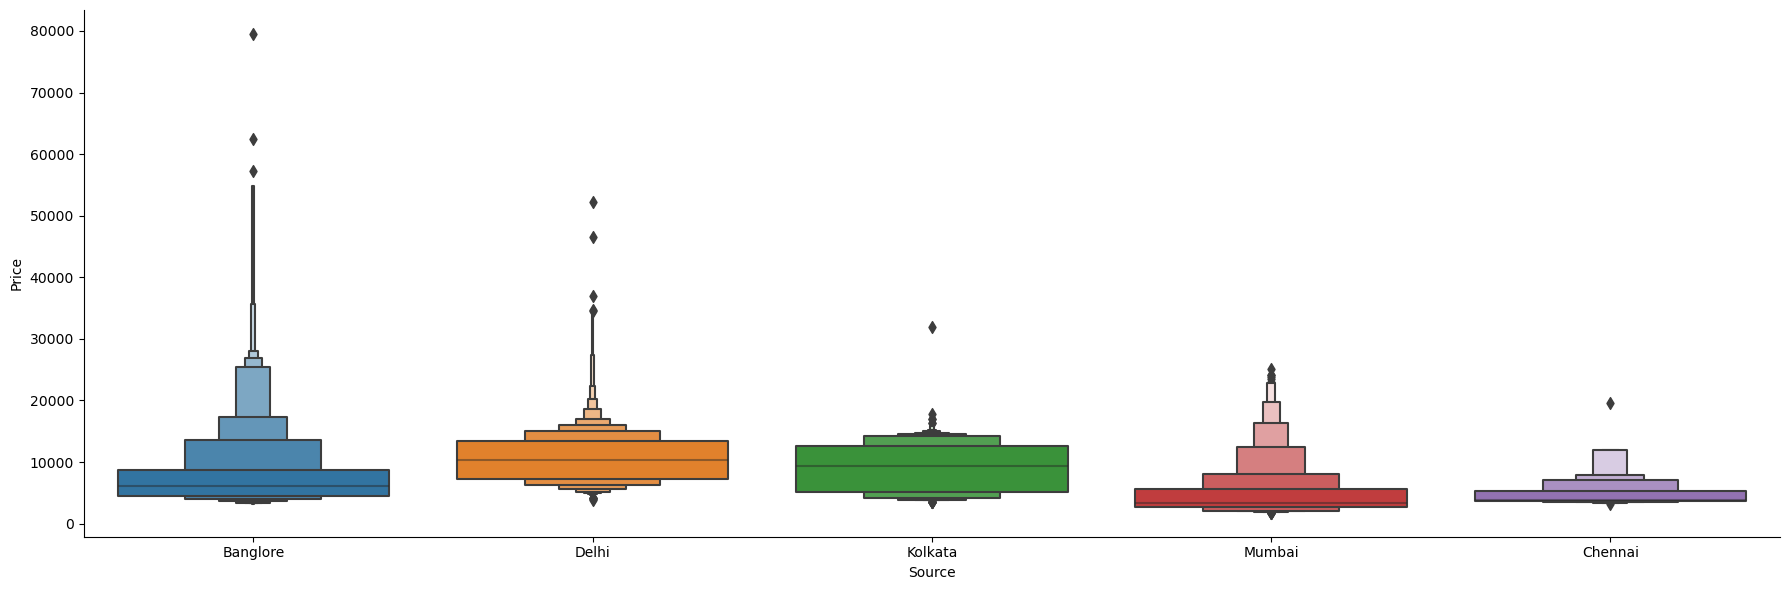

In [51]:
sns.catplot(y='Price',x='Source',data=df_train.sort_values('Price',ascending=False),kind="boxen",height=6,aspect=3)

In [52]:
Source=df_train['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


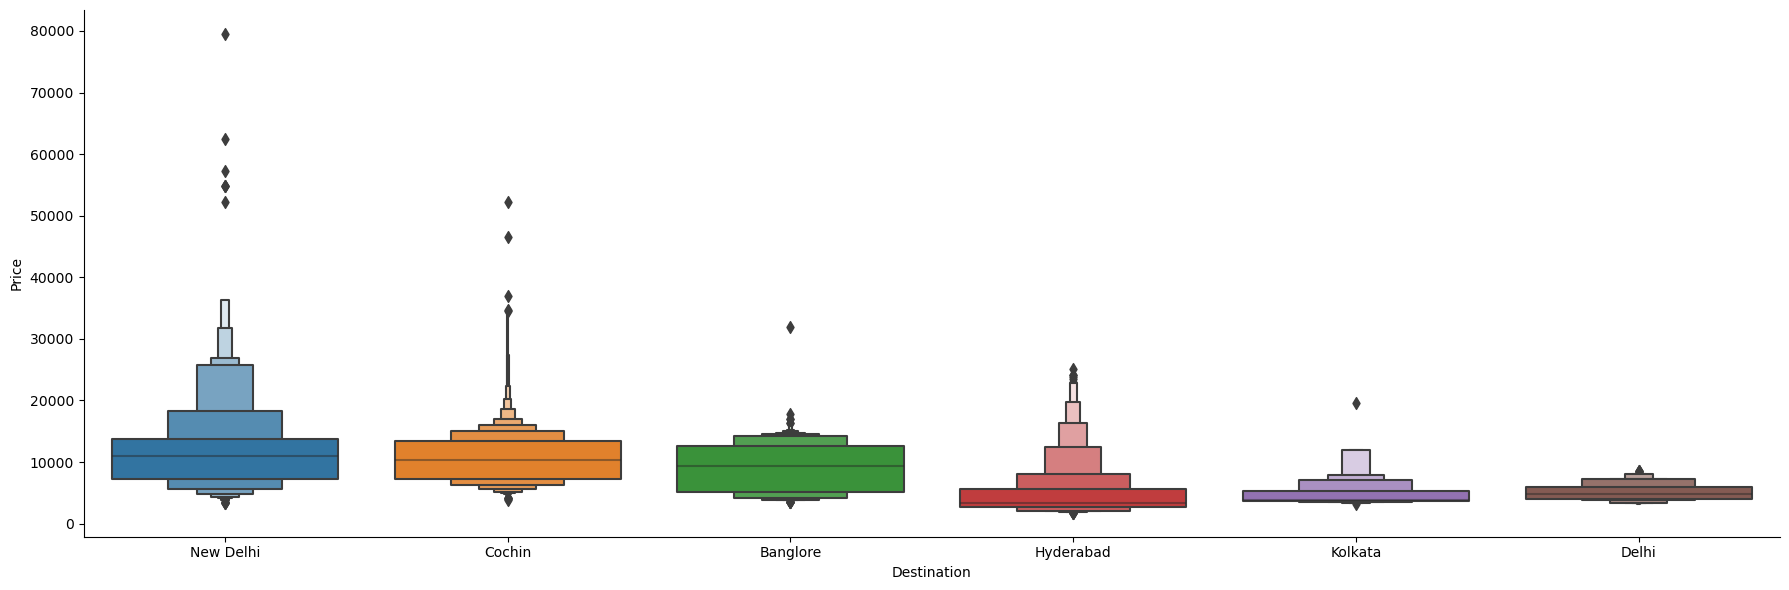

In [53]:
sns.catplot(y='Price',x='Destination',data=df_train.sort_values('Price',ascending=False),kind="boxen",height=6,aspect=3)

In [54]:
Destination=df_train['Destination']
Destination=pd.get_dummies(Source,drop_first=True)
Destination.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [55]:
data_train=pd.concat([df_train,Airline,Source,Destination],axis=1)

In [56]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,...,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Chennai,Delhi,Kolkata,Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,...,0,0,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,13,...,0,0,0,0,1,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,4,...,0,0,0,1,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,23,...,0,0,0,0,1,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,21,...,0,0,0,0,0,0,0,0,0,0


In [57]:
data_train.drop(['Airline','Source','Destination','Route','Additional_Info'],axis=1,inplace=True)
data_train.head()

,Total_Stops,Price,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,...,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Chennai,Delhi,Kolkata,Mumbai
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,0
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,0,1,0,0,0,1,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,0,1,0,0,0,1,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,0,1,0,0,0,1,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10681 non-null  int64
 1   Price                              10681 non-null  int64
 2   Date                               10681 non-null  int32
 3   Month                              10681 non-null  int32
 4   Arrival_Hour                       10681 non-null  int32
 5   Arrival_Min                        10681 non-null  int32
 6   Dep_Hour                           10681 non-null  int32
 7   Dep_Min                            10681 non-null  int32
 8   Duration_Hour                      10681 non-null  int32
 9   Duration_Min                       10681 non-null  int32
 10  Air India                          10681 non-null  uint8
 11  GoAir                              10681 non-null  uint8
 12  IndiGo            

In [59]:
data_train.shape

(10681, 29)

In [60]:
df_test=pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [61]:
df_test['Date']=df_test['Date_of_Journey'].str.split('/').str[0]
df_test['Month']=df_test['Date_of_Journey'].str.split('/').str[1]
df_test['Year']=df_test['Date_of_Journey'].str.split('/').str[2]
df_test.drop('Date_of_Journey',axis=1,inplace=True)
df_test['Date']=df_test['Date'].astype(int)
df_test['Month']=df_test['Month'].astype(int)
df_test['Year']=df_test['Year'].astype(int)
df_test.drop(['Route','Additional_Info'],axis=1,inplace=True)


In [62]:
df_test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Date,Month,Year
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,6,6,2019
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,12,5,2019
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,21,5,2019
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,21,5,2019
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,24,6,2019


In [63]:
df_test['Arrival_Time']=df_test['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [64]:
df_test['Arrival_Hour']=df_test['Arrival_Time'].str.split(':').str[0]
df_test['Arrival_Min']=df_test['Arrival_Time'].str.split(':').str[1]
df_test.drop('Arrival_Time',axis=1,inplace=True)
df_test['Arrival_Hour']=df_test['Arrival_Hour'].astype(int)
df_test['Arrival_Min']=df_test['Arrival_Min'].astype(int)
df_test['Dep_Hour']=df_test['Dep_Time'].str.split(':').str[0]
df_test['Dep_Min']=df_test['Dep_Time'].str.split(':').str[1]
df_test['Dep_Hour']=df_test['Dep_Hour'].astype(int)
df_test['Dep_Min']=df_test['Dep_Min'].astype(int)
df_test.drop('Dep_Time',axis=1,inplace=True)
df_test['Duration_Hour']=df_test['Duration'].str.split(' ').str[0].str.split('h').str[0]
df_test['Duration_Min']=df_test['Duration'].str.split(' ').str[1].str.split('m').str[0]

df_test['Duration_Min']=df_test['Duration_Min'].replace(np.nan,'0')
df_test['Duration_Min']=df_test['Duration_Min'].astype(int)


In [65]:
df_test[df_test['Duration_Hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
2660,Air India,Mumbai,Hyderabad,5m,2 stops,12,3,2019,16,55,16,50,5m,0


In [66]:
df_test.drop(2660,axis=0,inplace=True)
df_test['Duration_Hour']=df_test['Duration_Hour'].astype(int)
df_test.drop('Duration',axis=1,inplace=True)

In [67]:
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
Airline=df_test['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Source=df_test['Source']
Source=pd.get_dummies(Source,drop_first=True)
Destination=df_test['Destination']
Destination=pd.get_dummies(Source,drop_first=True)
data_test=pd.concat([df_test,Airline,Source,Destination],axis=1)
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data_train.head()


,Total_Stops,Price,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,...,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Chennai,Delhi,Kolkata,Mumbai
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,0
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,0,1,0,0,0,1,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,0,1,0,0,0,1,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,0,1,0,0,0,1,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data_train.shape

(10681, 29)

In [69]:
data_train.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Arrival_Hour', 'Arrival_Min',
       'Dep_Hour', 'Dep_Min', 'Duration_Hour', 'Duration_Min', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'],
      dtype='object')

In [70]:
x= data_train.loc[:,['Total_Stops', 'Date', 'Month', 'Arrival_Hour',
       'Arrival_Min', 'Dep_Hour', 'Dep_Min', 'Duration_Hour', 'Duration_Min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']]
x.head()

,Total_Stops,Date,Month,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,Air India,...,Mumbai,Mumbai,Chennai,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Mumbai
0,0,24,3,1,10,22,20,2,50,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,5,13,15,5,50,7,25,1,...,0,0,0,0,0,0,1,1,0,0
2,2,9,6,4,25,9,25,19,0,0,...,0,0,0,0,1,1,0,0,0,0
3,1,12,5,23,30,18,5,5,25,0,...,0,0,0,0,0,0,1,1,0,0
4,1,1,3,21,35,16,50,4,45,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y= data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

C:\Users\Prabhav\AppData\Local\Temp\ipykernel_22768\4248340406.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


<Axes: >

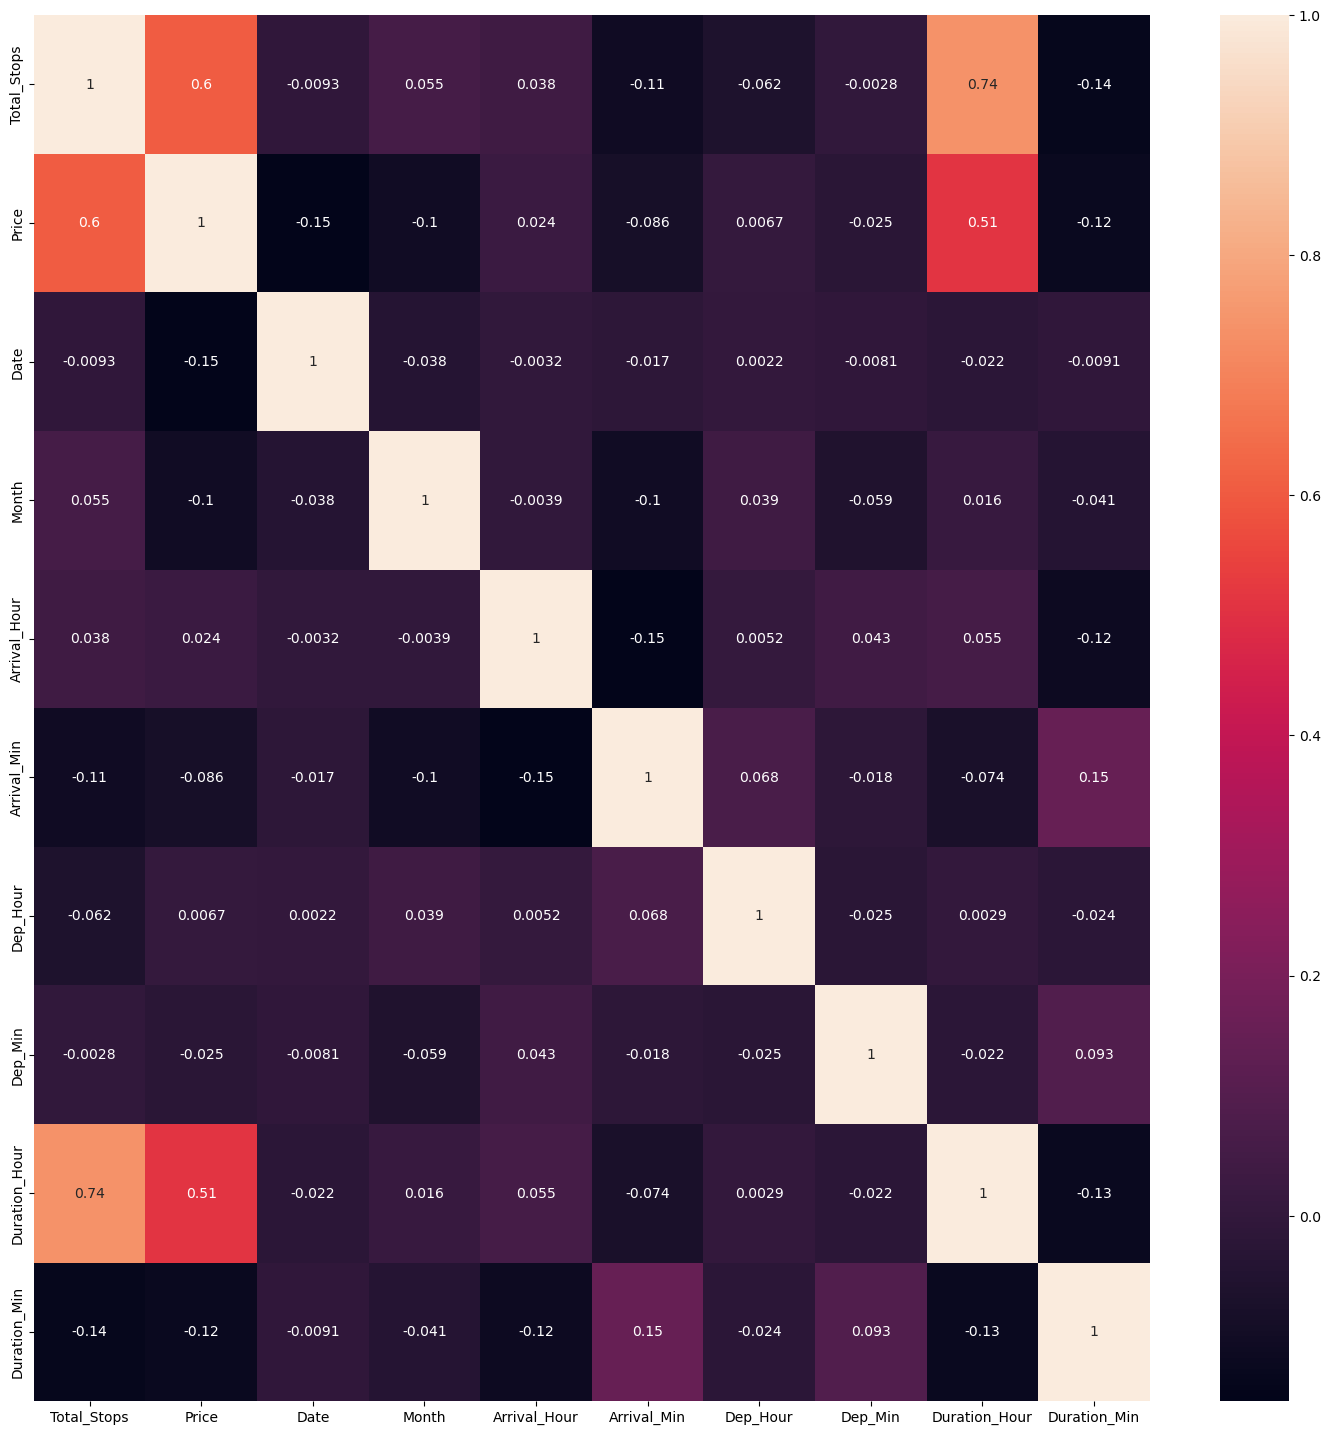

In [72]:
plt.figure(figsize=(18,18))
sns.heatmap(df_train.corr(),annot=True)

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [74]:
print(selection.feature_importances_)

[2.07618236e-01 1.33889746e-01 6.55521964e-02 2.72730554e-02
 1.88968093e-02 2.42295269e-02 2.13438536e-02 1.55115238e-01
 1.90790245e-02 1.05029814e-02 1.70773260e-03 1.77775652e-02
 1.32202189e-01 6.75026370e-02 2.05732270e-02 8.49440649e-04
 5.37753692e-03 1.01115240e-04 4.62461727e-03 8.86141318e-05
 4.97863881e-04 5.59289752e-04 8.18864341e-03 8.70620374e-03
 3.78631107e-03 3.26195521e-03 4.35599726e-03 3.47541259e-03
 5.33039870e-04 4.80782761e-04 7.91975249e-03 8.49499589e-03
 3.07705630e-03 3.63802934e-03 3.37086577e-03 5.34845837e-03]


<Axes: >

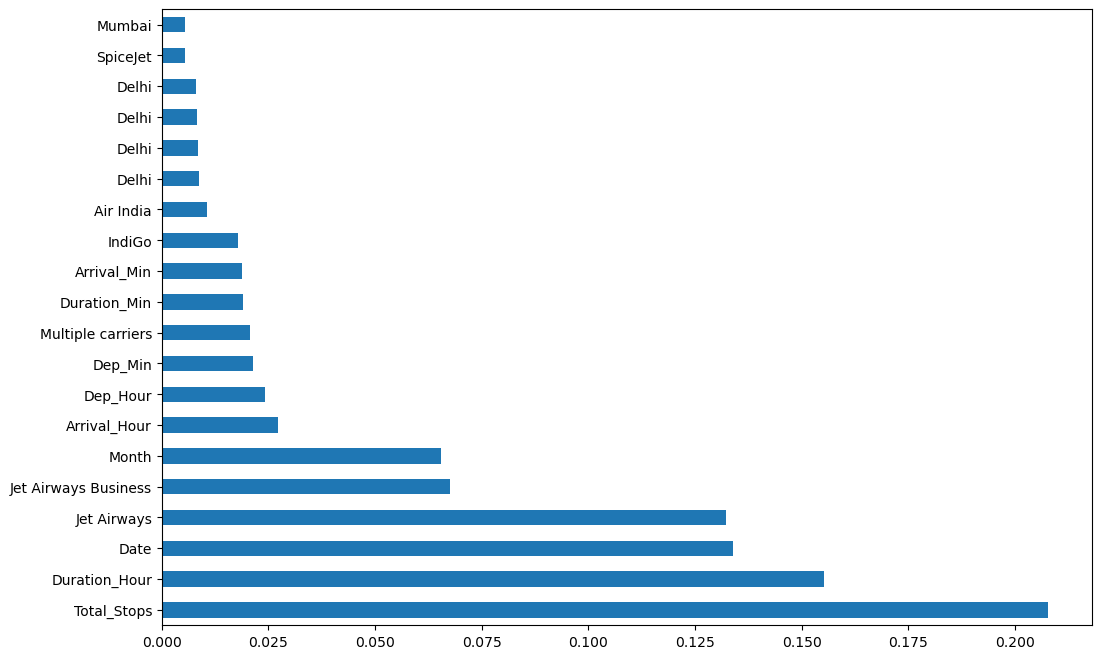

In [77]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [85]:
y_pred=reg_rf.predict(x_test)

In [87]:
reg_rf.score(x_train,y_train)

0.9538246432504244

In [88]:
reg_rf.score(x_test,y_test)

0.8012288647886393

C:\Users\Prabhav\AppData\Local\Temp\ipykernel_22768\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


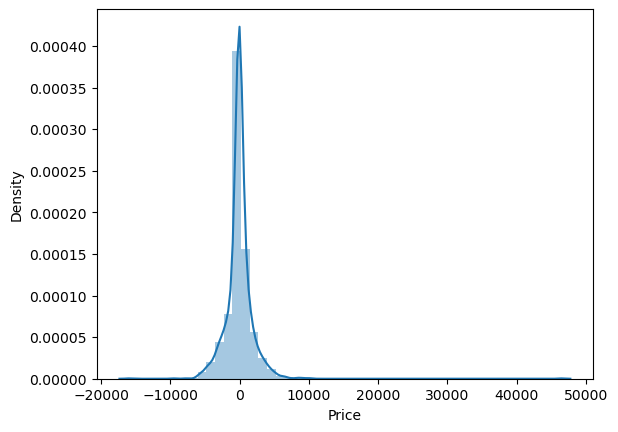

In [99]:
sns.distplot(y_test-y_pred)
plt.show()

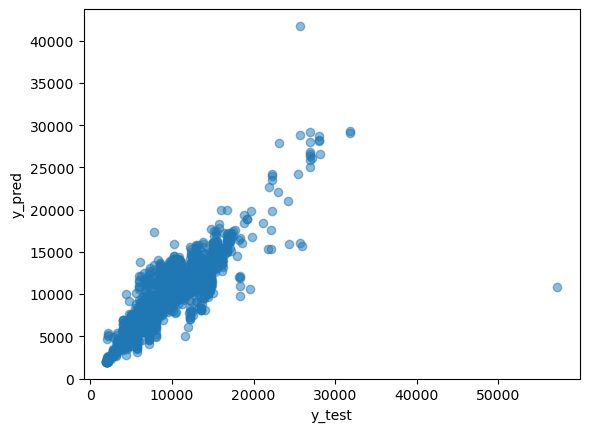

In [98]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [103]:
from sklearn import metrics

In [105]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1138.3461864755118
MSE: 4196408.6983741205
RMSE: 2048.51377793124


In [106]:
metrics.r2_score(y_test,y_pred)

0.8012288647886393

In [ ]:
# done with good accuracy model